# Off-Axis Propagation

## Calculation of band structure

In this exercise we will make use of the QWS structure again, but this time we will get the on and off-axis bands for different polarizations. So we will just show a snippet of the code we used last time, and we will just modify the $k$-points:

In [1]:
import meep as mp
from meep import mpb
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

resolution = 128 

a = 1 # arbitrary units
w1 = 0.2 * a
w2 = 0.8 * a # For the Quarter Wave Stack: w2 = a - w1

Med_1 = mp.Medium(index=np.sqrt(13))
Med_2= mp.Medium(index=1)

sc_z = 1 * a  # supercell width

geometry_lattice = mp.Lattice(size=mp.Vector3(0,0,sc_z))

center1 = 0.5*(-sc_z + w1)
center2 = 0.5*(sc_z - w2)
geometry = [mp.Block(size=mp.Vector3(mp.inf, mp.inf, w1),
                     center=mp.Vector3(0,0,center1), material=Med_1),mp.Block(size=mp.Vector3(mp.inf, mp.inf, w2),
                     center=mp.Vector3(0,0,center2), material=Med_2)]

num_bands = 10

num_k = 40
k_minz = -0.5
k_maxz = 0.0
k_miny = 0.0
k_maxy = 1.5

k_pointsz = mp.interpolate(num_k, [mp.Vector3(0,0,k_minz), mp.Vector3(0,0,k_maxz)])
k_pointsy = mp.interpolate(num_k, [mp.Vector3(0,k_miny,k_maxz), mp.Vector3(0,k_maxy,k_maxz)])
k_points = k_pointsz + k_pointsy

ms = mpb.ModeSolver(geometry_lattice=geometry_lattice,
                    geometry=geometry,
                    k_points=k_points,
                    resolution=resolution,
                    num_bands=num_bands)
ms.run()

Initializing eigensolver data
Computing 10 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 1 x 1 x 128.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,-0.4)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0.1)
          size (1e+20,1e+20,0.8)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 2 and 5 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
84 k-points
  Vector3<0.0, 0.0, -0.5>
  Vector3<0.0, 0.0, -0.4878048780487805>
  Vector3<0.0, 0.0, -0.47560975609756095>
  Vector3<0.0, 0.0, -0.46341463414634143>
  Vector3<0.0, 0.0, -0.45121951219512196>
  V

Now, we have passed everything down to `oap_ms.py` and run. We then generate some **band files** to plot them later. This was done by means of the `grep` command, i.e.: `grep freqs: oap_data.dat > oap_bands.dat`. To access these files:

In [2]:
import os
path = os.path.abspath(os.getcwd())
print(path)

/home/ben/Desktop/Thesis/github/Thesis_name/Simulations/01_Multilayer_Film/Off-axis_propagation


In [3]:
f = np.genfromtxt(path+"/data/oap_bands.dat", delimiter=",")[:-1,1:]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


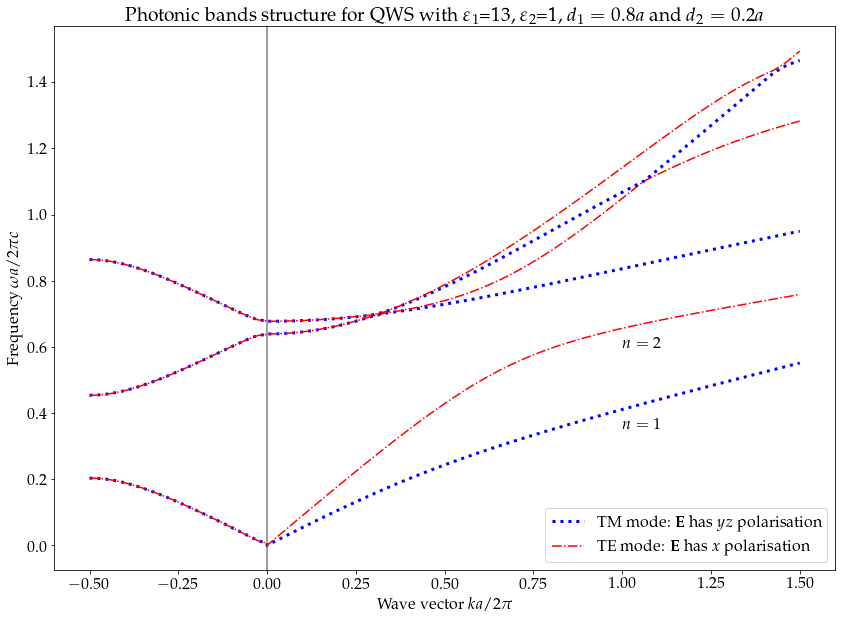

In [4]:
fig, ax = plt.subplots(figsize=(14,10))
title = "Photonic bands structure for QWS with $\\varepsilon_1$=13, $\\varepsilon_2$=1, $d_1=0.8a$ and $d_2=0.2a$"
plt.axvline(x=0, c='black', alpha=0.5)
ax.plot(np.concatenate((f[:40,3],f[40:,2])), f[:,-10], c='b', linestyle='dotted', linewidth=3, label='TM mode: $\mathbf{E}$ has $yz$ polarisation') # TM mode
ax.plot(np.concatenate((f[:40,3],f[40:,2])), f[:,-9], c='r', linestyle='dashdot', label='TE mode: $\mathbf{E}$ has $x$ polarisation') # TE mode
ax.plot(np.concatenate((f[:40,3],f[40:,2])), f[:,-8], c='b',linestyle='dotted', linewidth=3) # TM mode
ax.plot(np.concatenate((f[:40,3],f[40:,2])), f[:,-7], c='r', linestyle='dashdot') # TE mode
ax.plot(np.concatenate((f[:40,3],f[40:,2])), f[:,-6], c='b', linestyle='dotted', linewidth=3) # TM mode
ax.plot(np.concatenate((f[:40,3],f[40:,2])), f[:,-5], c='r', linestyle='dashdot') # TE mode
ax.set_title(title)
ax.set_xlabel("Wave vector $k a / 2 \pi$")
ax.set_ylabel("Frequency $\omega a / 2 \pi c$")
ax.text(1,0.35, '$n=1$')
ax.text(1,0.6, '$n=2$')
ax.legend(loc=4)

As we can see in the graph, on-axis the bands are degenerate for the two polarizations. Why? Because of a rotational symmetry in the $X$ and $Y$ directions! However, **along $k_y$ the bands split** into two distinct polarizations, so degeneracy is lifted!

## Long wavelength limit

Both polarizations will be linear in the long wavelength ($\omega \to 0$, $k \to 0$) limit, which is a characteristic of all photonic crystals: $\omega_{\nu}(\mathbf{k})=c_{\nu}(\mathbf{\hat{k}})k$.

Why is the dispersion relation always linear at long wavelengths? At long
wavelengths, the electromagnetic wave doesn’t probe the fine structure of the
crystal lattice. Instead, the light effectively sees a homogeneous dielectric medium,
with an effective dielectric constant that is a weighted average over all of the
“microscopic” variations in $\varepsilon$.

<img src="media/long_wave.png" width="800">

We would like to understand why modes polarized in the $X$ direction (band 1 in plot) have a lower frequency than modes polarized in the $YZ$ plane (band 2 in plot). Once again we use our heuristic: the lower modes concentrate their electrical energy in the high-$\varepsilon$ regions. In this case, we focus on the long-wavelength limit of each mode. The fields for both bands are shown schematically in figure 9. For the $X$-polarized wave, the displacement fields lie in the high-$\varepsilon$ regions. But at long wavelengths, the polarization of band 2 is almost entirely along the $Z$ direction, crossing both the low-$\varepsilon$ and the high-$\varepsilon$ regions. Continuity forces the field to penetrate the low-$\varepsilon$ region, leading to
a higher frequency.

## Short wavelength limit

Now we will focus on the short wavelength ($\omega \to \infty$, $k \to \infty$) limit.

We will run two simulations one for $k_y$ points at $k_z=0$ and the other one for $k_y$ points at $k_z=\pi/a$. We will see how the band structures span across all $k_z$s.

The script looks something like:

In [5]:
import meep as mp
from meep import mpb
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

resolution = 128 

a = 1 # arbitrary units
w1 = 0.2 * a
w2 = 0.8 * a # For the Quarter Wave Stack: w2 = a - w1

Med_1 = mp.Medium(index=np.sqrt(13))
Med_2= mp.Medium(index=1)

sc_z = 1 * a  # supercell width

geometry_lattice = mp.Lattice(size=mp.Vector3(0,0,sc_z))

center1 = 0.5*(-sc_z + w1)
center2 = 0.5*(sc_z - w2)
geometry = [mp.Block(size=mp.Vector3(mp.inf, mp.inf, w1),
                     center=mp.Vector3(0,0,center1), material=Med_1),mp.Block(size=mp.Vector3(mp.inf, mp.inf, w2),
                     center=mp.Vector3(0,0,center2), material=Med_2)]

num_bands = 10

num_k = 40
k_z = -0.0 #This is the one that has to be changed
k_miny = 0.0
k_maxy = 1.5

k_points = mp.interpolate(num_k, [mp.Vector3(0,k_miny,k_z), mp.Vector3(0,k_maxy,k_z)])

ms = mpb.ModeSolver(geometry_lattice=geometry_lattice,
                    geometry=geometry,
                    k_points=k_points,
                    resolution=resolution,
                    num_bands=num_bands)
ms.run()

Initializing eigensolver data
Computing 10 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 1 x 1 x 128.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,-0.4)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0.1)
          size (1e+20,1e+20,0.8)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 2 and 5 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
42 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.036585365853658534, 0.0>
  Vector3<0.0, 0.07317073170731707, 0.0>
  Vector3<0.0, 0.1097560975609756, 0.0>
  Vector3<0.0, 0.14634146341463414, 0.0>
  Vecto

Now, we have passed everything down to `oap_ms_sw_0.py` and run. We then generate some **band files** to plot them later. This was done by means of the `grep` command, i.e.: `grep freqs: oap_sw_0_data.dat > oap_sw_0_bands.dat`. To access the files:

In [6]:
f0 = np.genfromtxt(path+"/data/oap_sw_0_bands.dat", delimiter=",")[:-1,1:]
f1 = np.genfromtxt(path+"/data/oap_sw_1_bands.dat", delimiter=",")[:-1,1:]

We will just plot the $TE$ modes of both configurations:

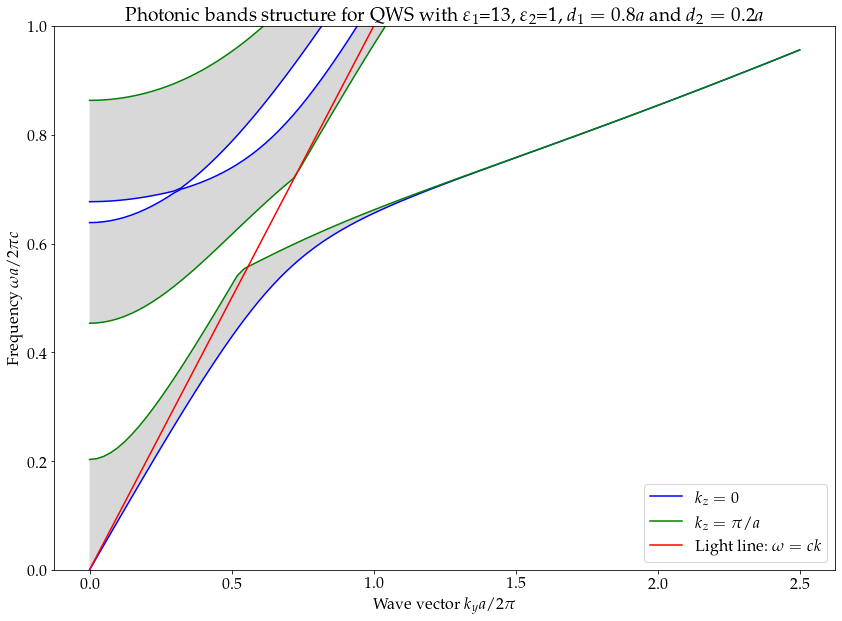

In [7]:
fig, ax = plt.subplots(figsize=(14,10))
title = "Photonic bands structure for QWS with $\\varepsilon_1$=13, $\\varepsilon_2$=1, $d_1=0.8a$ and $d_2=0.2a$"
ax.plot(f0[:,2], f0[:,-9], c='b', label='$k_z=0$') 
ax.plot(f1[:,2], f1[:,-9], c='g', label='$k_z=\pi/a$')
ax.fill_between(f0[:,2],f0[:,-9],f1[:,-9], facecolor='gray', alpha=0.3)
ax.plot(f0[:,2], f0[:,-7], c='b') 
ax.plot(f1[:,2], f1[:,-7], c='g')
ax.fill_between(f0[:,2],f0[:,-7],f1[:,-7], facecolor='gray', alpha=0.3)
ax.plot(f0[:,2], f0[:,-5], c='b') 
ax.plot(f1[:,2], f1[:,-5], c='g')
ax.fill_between(f0[:,2],f0[:,-5],f1[:,-5], facecolor='gray', alpha=0.3)
ax.plot(f0[:,2], f0[:,2], c='r', label='Light line: $\omega = ck$')
ax.set_title(title)
ax.set_xlabel("Wave vector $k_y a / 2 \pi$")
ax.set_ylabel("Frequency $\omega a / 2 \pi c$")
ax.set_ylim(0,1)
ax.legend(loc=4)

As we saw for the case of a plane of glass, once the frequency is below the light line $\omega = c k_y$ , the modes are index guided and decay exponentially into the air region. As $k_y$ is increased, the overlap between modes within neighboring layers of high-$\varepsilon$ material goes exponentially to zero. The coupling between neighboring planes becomes small, and each plane essentially guides its own mode independent of its neighbors. In this case, the mode frequency becomes independent of the on-axis wave vector, and every mode in the band becomes the frequency of a guided mode that is trapped by the high-$\varepsilon$ layers.